In [63]:
import os
import matplotlib.pyplot as plt
import numpy as np

from matplotlib import rc
import seaborn as sns
%config InlineBackend.figure_format = 'retina'
rc('savefig', dpi = 300)
rc('figure', dpi = 100)


def format_plot(xlabel, ylabel, title, width=6, height=4, grid='on', despine=10):
    f = plt.gcf()
    f.set_size_inches(width,height)
    ax = plt.gca()
    sns.despine(offset=despine)
    plt.grid(grid)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title, loc='left', fontweight='bold')
    
    leg = ax.get_legend()
    if leg is not None:
        leg.get_frame().set_linewidth(0.0)
        leg.get_frame().set_alpha(0.5)

    plt.tight_layout()

value_map = {
  0: 0,
  2.4039216: 32,
  2.992157: 24,
  3.5882354: 12,
  3.7882354: 6,
  1.6392157: 3,
  2.827451: 1.5,
  2.784314: 0.75,
  1.9960785: 0.25,
}

def convert_img(img):
  img_sum = np.sum(img, axis=2)
  img_r = np.squeeze(img[:, :, 0])
  for k, v in value_map.items():
    img_sum[img_sum + img_r == k] = v
  return img_sum

# files = os.listdir('D:\\rainfall\\rainfall')

# rainfall = None

# for i, file in enumerate(files):
#     if file.endswith('.png'):
#         print(f"Processing {file} {i + 1} / {len(files)}")
#         try:
#           img = plt.imread(file)
#           r = convert_img(img)

#           if rainfall is None:
#             rainfall = r
#           else:
#             rainfall += r
#         except:
#            pass

# f, ax = plt.subplots(1,1, figsize=(20,20))
# plt.imshow(rainfall)
# plt.colorbar()
# plt.clim([0, 10])
# plt.show()


In [3]:
import os
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
from multiprocessing.pool import ThreadPool

files = os.listdir('D:\\rainfall\\rainfall')

def process_file(file: str):
      if file.endswith('.png'):
            print(f"Processing {file}")
            try:
                  img = plt.imread(file)
                  r = convert_img(img)
                  r = (r * 4).astype(np.uint8)
                  img = Image.fromarray(r)
                  img.save(f'D:\\rainfall\\rainfall\mono\{file}')
            except Exception as e:
                  print(e)
                  

with ThreadPool(8) as pool:
      pool.map(process_file, files)


Processing 2023-06-01T00-00-00Z.pngProcessing 2023-06-02T13-00-00Z.png
Processing 2023-06-04T02-00-00Z.png

Processing 2023-06-05T15-00-00Z.png
Processing 2023-06-07T04-00-00Z.png
Processing 2023-06-08T17-00-00Z.png
Processing 2023-06-10T06-00-00Z.png
Processing 2023-06-11T19-00-00Z.png
Processing 2023-06-02T13-15-00Z.pngProcessing 2023-06-01T00-15-00Z.png

Processing 2023-06-04T02-15-00Z.png
Processing 2023-06-05T15-15-00Z.pngProcessing 2023-06-07T04-15-00Z.png

Processing 2023-06-11T19-15-00Z.pngProcessing 2023-06-08T17-15-00Z.png

Processing 2023-06-10T06-15-00Z.png
Processing 2023-06-02T13-30-00Z.png
Processing 2023-06-01T00-30-00Z.png
Processing 2023-06-05T15-30-00Z.png
Processing 2023-06-04T02-30-00Z.png
Processing 2023-06-07T04-30-00Z.png
Processing 2023-06-08T17-30-00Z.png
Processing 2023-06-11T19-30-00Z.png
Processing 2023-06-10T06-30-00Z.png
Processing 2023-06-02T13-45-00Z.png
Processing 2023-06-01T00-45-00Z.png
not a PNG file
Processing 2023-06-01T01-00-00Z.png
not a PNG fil

In [12]:
import PIL
help(PIL)

Help on package PIL:

NAME
    PIL - Pillow (Fork of the Python Imaging Library)

DESCRIPTION
    Pillow is the friendly PIL fork by Alex Clark and Contributors.
        https://github.com/python-pillow/Pillow/
    
    Pillow is forked from PIL 1.1.7.
    
    PIL is the Python Imaging Library by Fredrik Lundh and Contributors.
    Copyright (c) 1999 by Secret Labs AB.
    
    Use PIL.__version__ for this Pillow version.
    
    ;-)

PACKAGE CONTENTS
    BdfFontFile
    BlpImagePlugin
    BmpImagePlugin
    BufrStubImagePlugin
    ContainerIO
    CurImagePlugin
    DcxImagePlugin
    DdsImagePlugin
    EpsImagePlugin
    ExifTags
    FitsStubImagePlugin
    FliImagePlugin
    FontFile
    FpxImagePlugin
    FtexImagePlugin
    GbrImagePlugin
    GdImageFile
    GifImagePlugin
    GimpGradientFile
    GimpPaletteFile
    GribStubImagePlugin
    Hdf5StubImagePlugin
    IcnsImagePlugin
    IcoImagePlugin
    ImImagePlugin
    Image
    ImageChops
    ImageCms
    ImageColor
    ImageDr

(2962, 4324)


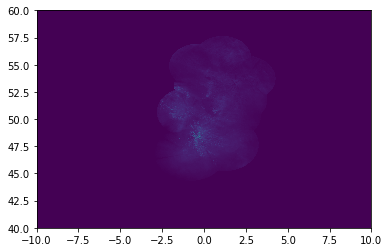

In [53]:
ny, nx = rainfall.shape

print(rainfall.shape)

x = np.linspace(-10, 10, nx + 1)
y = np.linspace(40, 60, ny + 1)

plt.pcolormesh(x, y, rainfall)
plt.show()

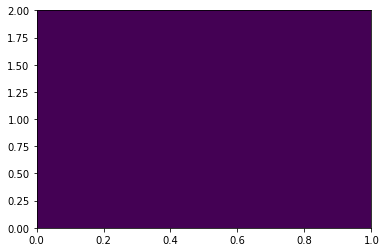

In [52]:
C = np.zeros((10, 11))
ny, nx = C.shape
x = np.linspace(0, 1, nx + 1)
y = np.linspace(0, 2, ny + 1)

plt.pcolormesh(x, y, C)
plt.show()

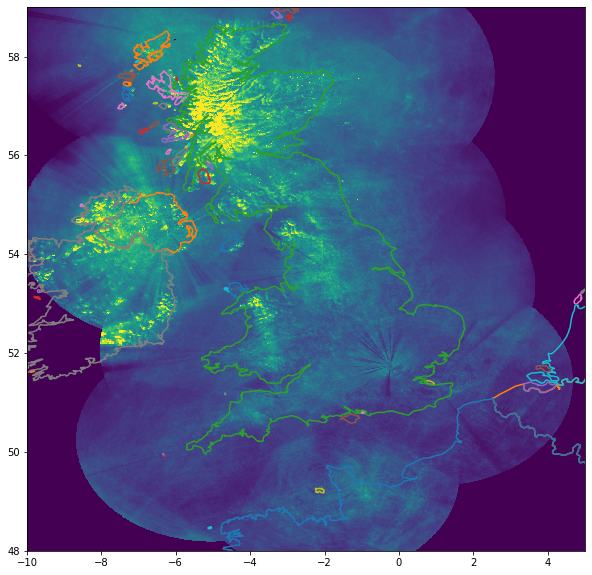

In [85]:
import json

ny, nx = rainfall.shape

cx = -4.3
rx = 21
cy = 55.2
ry = 10.1
x = np.linspace(cx-rx, cx + rx, nx + 1)
y = np.linspace(cy+ry, cy-ry, ny + 1)

f, ax = plt.subplots(1,1,figsize=(10,10))

plt.pcolormesh(x, y, rainfall)
plt.clim([0, 2000])

with open('D:\\rainfall\\countries.json') as f:
    gj = json.loads(f.read())

for feature in gj['features']:
    if feature['type'] == 'Feature':
      if feature['geometry']['type'] == 'Polygon':
        for coord in feature['geometry']['coordinates']:
              x = [p[0] for p in coord]
              y = [p[1] for p in coord]
              plt.plot(x, y)
      if feature['geometry']['type'] == 'MultiPolygon':
        for elem in feature['geometry']['coordinates']:
              for coord in elem:
                x = [p[0] for p in coord]
                y = [p[1] for p in coord]
                plt.plot(x, y)

plt.xlim([-10, 5])
plt.ylim([48, 59])
plt.show()

In [68]:
import os
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
from multiprocessing.pool import ThreadPool

files = os.listdir('D:\\rainfall\\rainfall')
Nz = len(files)

x1 = 400 * 4
x2 = 750 * 4
y1 = 200 * 4
y2 = 600 * 4

img = plt.imread(files[1000])
Ny, Nx, _ = img.shape

r3d = np.zeros((y2 - y1,x2 - x1,Nz), dtype=np.uint8)

def process_file(arg: tuple[int, str]):
      index, file = arg
      if file.endswith('.png'):
            print(f"Processing {file} ({index})")
            try:
                  img = plt.imread(file)
                  img = img[y1:y2, x1:x2]
                  r = convert_img(img)
                  r = (r * 4).astype(np.uint8)
                  img = Image.fromarray(r)
                  r3d[:,:,index] = img
            except Exception as e:
                  print(e)
                  
# process_file((0, 'D:\\rainfall\\rainfall\\2023-06-09T07-30-00Z.png'))

with ThreadPool(8) as pool:
      pool.map(process_file, enumerate(files))

Processing 2023-06-01T00-00-00Z.png (0)Processing 2023-06-02T13-00-00Z.png (148)
Processing 2023-06-04T02-00-00Z.png (296)
Processing 2023-06-05T15-00-00Z.png (444)
Processing 2023-06-07T04-00-00Z.png (592)

Processing 2023-06-08T17-00-00Z.png (740)
Processing 2023-06-10T06-00-00Z.png (888)
Processing 2023-06-11T19-00-00Z.png (1036)
Processing 2023-06-10T06-15-00Z.png (889)Processing 2023-06-08T17-15-00Z.png (741)Processing 2023-06-02T13-15-00Z.png (149)Processing 2023-06-07T04-15-00Z.png (593)Processing 2023-06-04T02-15-00Z.png (297)Processing 2023-06-01T00-15-00Z.png (1)Processing 2023-06-11T19-15-00Z.png (1037)Processing 2023-06-05T15-15-00Z.png (445)







Processing 2023-06-01T00-30-00Z.png (2)
Processing 2023-06-04T02-30-00Z.png (298)Processing 2023-06-05T15-30-00Z.png (446)

Processing 2023-06-11T19-30-00Z.png (1038)Processing 2023-06-02T13-30-00Z.png (150)

Processing 2023-06-07T04-30-00Z.png (594)
Processing 2023-06-10T06-30-00Z.png (890)
Processing 2023-06-08T17-30-00Z.png (

In [69]:
np.save('D:\\rainfall\\rainfall\\r3d.npy', r3d)

In [76]:
im = Image.fromarray(s)
im.save('D:\\rainfall\\rainfall\\sum.png')

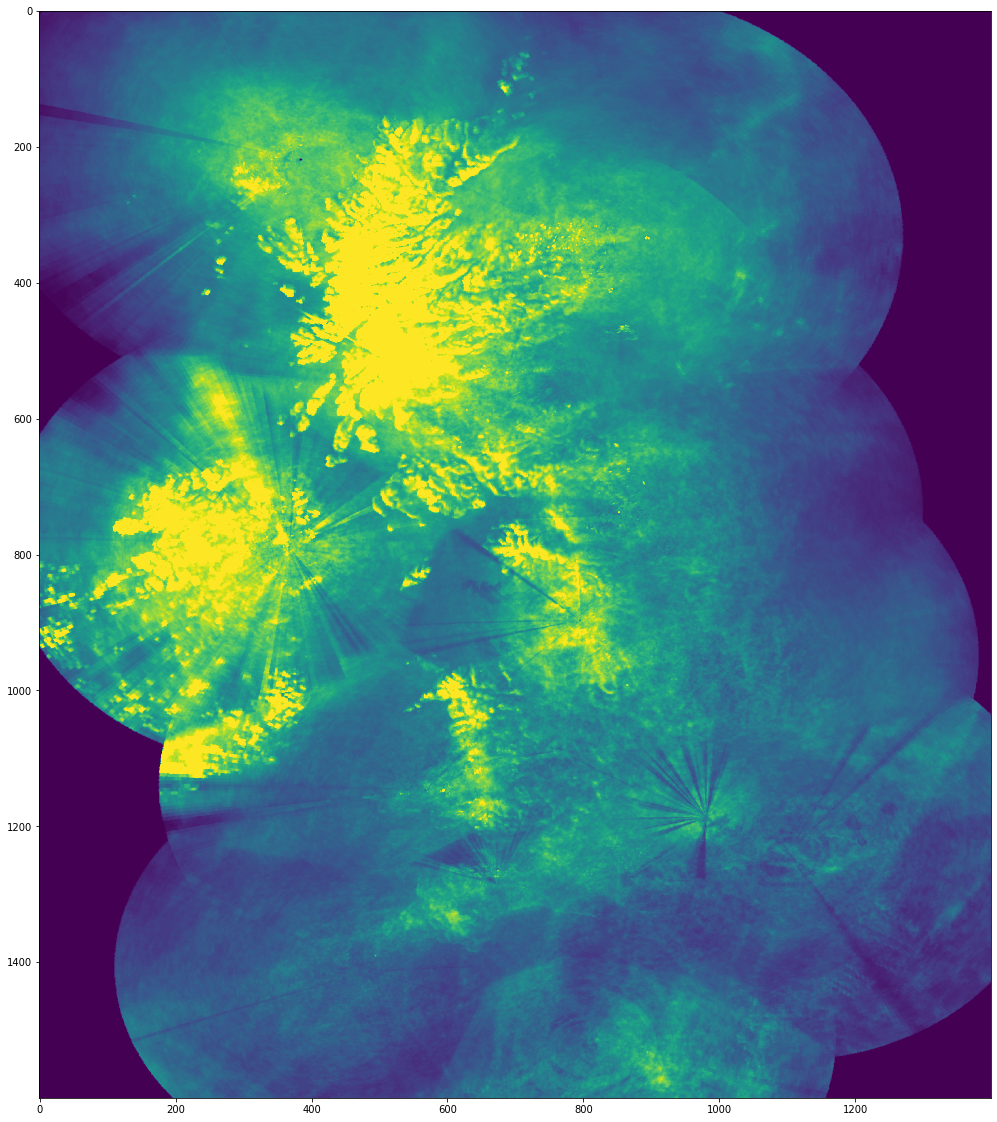

In [3]:
r3d = np.load('D:\\rainfall\\rainfall\\r3d.npy')

s = np.sum(r3d, axis=2)

f, ax = plt.subplots(1,1,figsize=(20,20))
plt.imshow(s)
plt.clim([0, 5000])
plt.show()

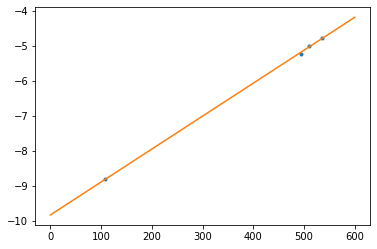

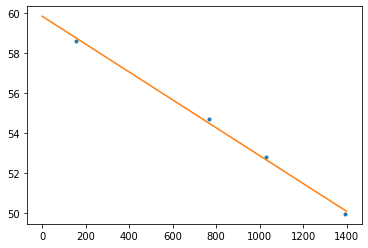

In [64]:
pix = [(509, 157), (108, 766), (536, 1030), (494, 1392)] # (x, y)
lls = [(-5.0027, 58.6121), (-8.8036, 54.6824), (-4.7605, 52.8039), (-5.2165, 49.9592)] # (lon, lat)

xs = [p[0] for p in pix]
lons = [l[0] for l in lls]
x_to_lon = np.polyfit(xs, lons, 1)

ys = [p[1] for p in pix]
lats = [l[1] for l in lls]
y_to_lat = np.polyfit(ys, lats, 1)

x_ax = np.linspace(0, 600, 100)
y_ax = np.linspace(0, 1400, 100)

plt.plot(xs, lons, '.')
plt.plot(x_ax, np.polyval(x_to_lon, x_ax))
plt.show()

plt.plot(ys, lats, '.')
plt.plot(y_ax, np.polyval(y_to_lat, y_ax))
plt.show()


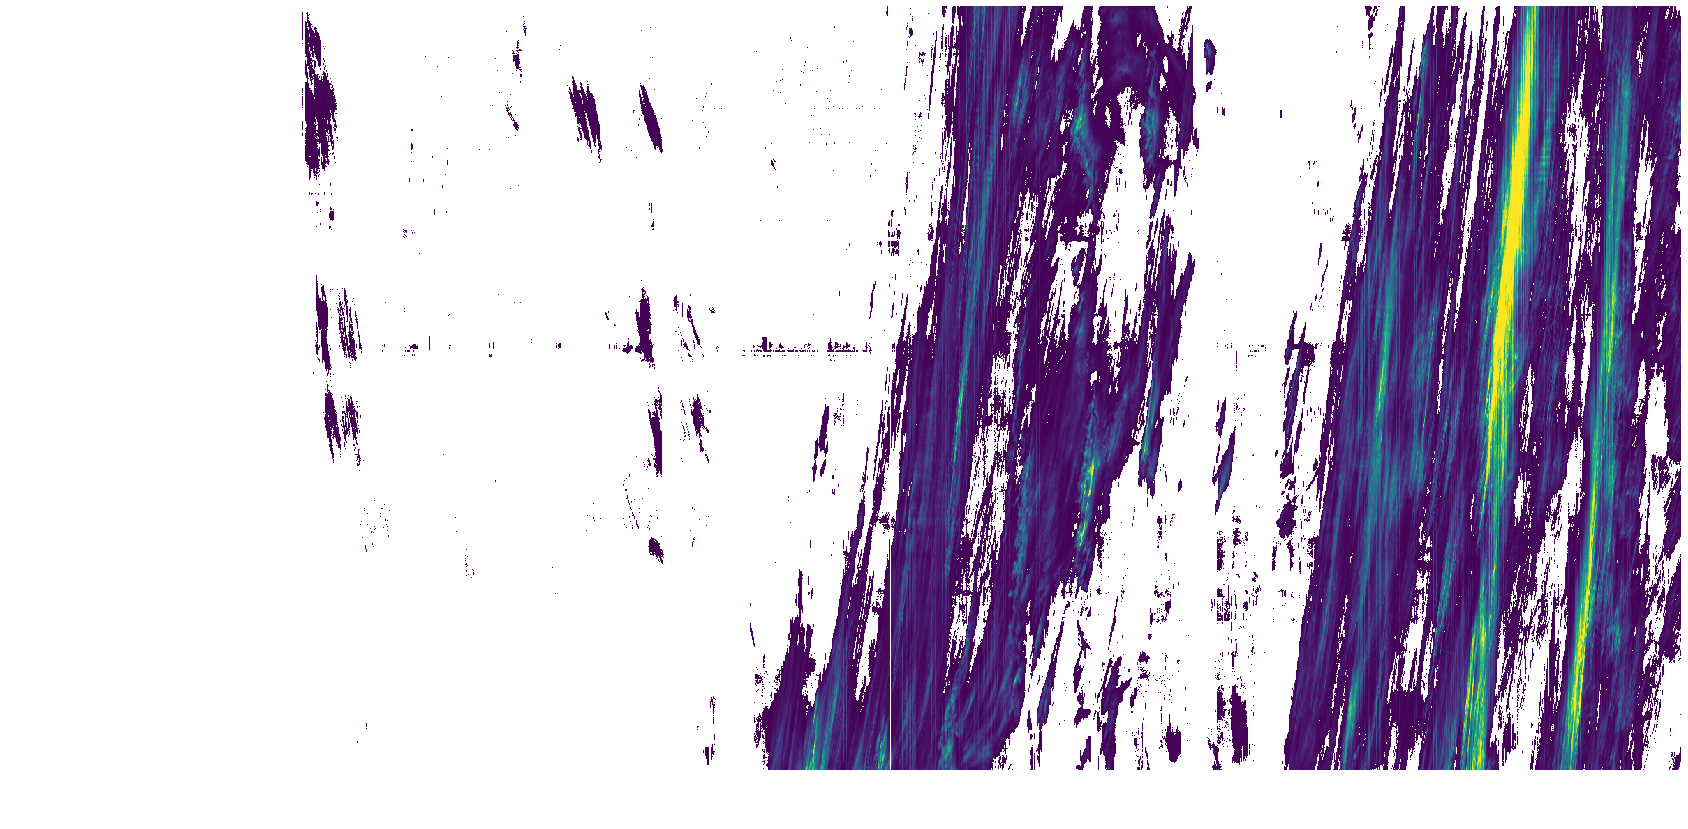

In [66]:
import json

Ny, Nx = s.shape

x_ax = np.linspace(0, Nx - 1, Nx)
lon_ax = np.polyval(x_to_lon, x_ax)

y_ax = np.linspace(0, Ny - 1, Ny)
lat_ax = np.polyval(y_to_lat, y_ax)


f, ax = plt.subplots(1,1,figsize=(30, 15))
plt.pcolormesh(lon_ax, lat_ax, s)



# with open('D:\\rainfall\\countries.json') as f:
# with open('D:\\rainfall\\rainfall\\uk_geojson.json') as f:
#     gj = json.loads(f.read())

# for feature in gj['features']:
#     if feature['type'] == 'Feature':
#       if feature['geometry']['type'] == 'Polygon':
#         for coord in feature['geometry']['coordinates']:
#               x = [p[0] for p in coord]
#               y = [p[1] for p in coord]
#               plt.plot(x, y)
#       if feature['geometry']['type'] == 'MultiPolygon':
#         for elem in feature['geometry']['coordinates']:
#               for coord in elem:
#                 x = [p[0] for p in coord]
#                 y = [p[1] for p in coord]
#                 plt.plot(x, y)

plt.axis('equal')
plt.xlim([-10, 5])
plt.ylim([48, 59])
# plt.colorbar()
plt.clim([1, 8e3])
plt.axis('off')
plt.set_cmap('cmap')

plt.show()

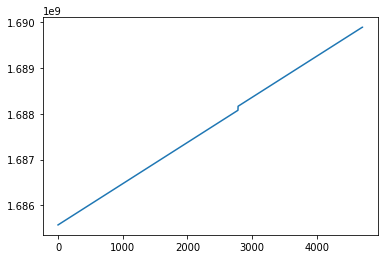

In [68]:
import time
import datetime

def parse_ts(ts: str):
  return time.mktime(datetime.datetime.strptime(ts, "%Y-%m-%dT%H-%M-%SZ.png").timetuple())

files = os.listdir('D:\\rainfall\\rainfall')

Nz = r3d.shape[2]

t = np.zeros((Nz, 1))

i = 0
for f in files:
  if f.startswith('2023-'):
    t[i] = parse_ts(f)
    i += 1

t[t == 0] = np.max(t)

plt.plot(t)
plt.show()

NameError: name 'format_plot' is not defined

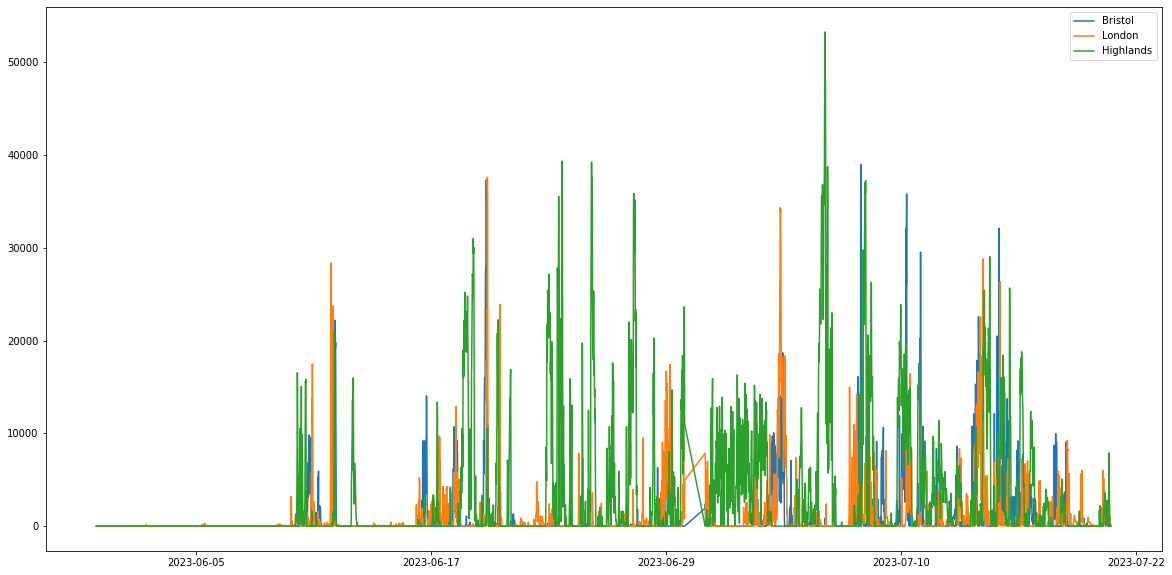

In [69]:
bristol = (785, 1204)
london = (989, 1193)
highlands = (489, 432)
r = 20

def to_ts(coords: tuple[int, int]):
  return np.sum(r3d[coords[1] - r:coords[1] + r, coords[0] - r:coords[0] + r, :], axis=(0, 1))

bristol_ts = to_ts(bristol)
london_ts = to_ts(london)
highlands_ts = to_ts(highlands)

f, ax = plt.subplots(1,1,figsize=(20,10))
plt.plot(t, bristol_ts, label='Bristol')
plt.plot(t, london_ts, label='London')
plt.plot(t, highlands_ts, label='Highlands')
plt.legend()

import datetime
def format_time(t, pos):
  return str(datetime.datetime.utcfromtimestamp(t))[:10]

ax.xaxis.set_major_formatter(format_time)

format_plot('Time', 'Rainfall', 'Rainfall timeseries comparison')
plt.show()



C:\Users\jasmc\AppData\Local\Temp\ipykernel_15400\2760954883.py:17: UserWarning: Trying to register the cmap 'cmap' which already exists.
  plt.register_cmap('cmap', cmap)


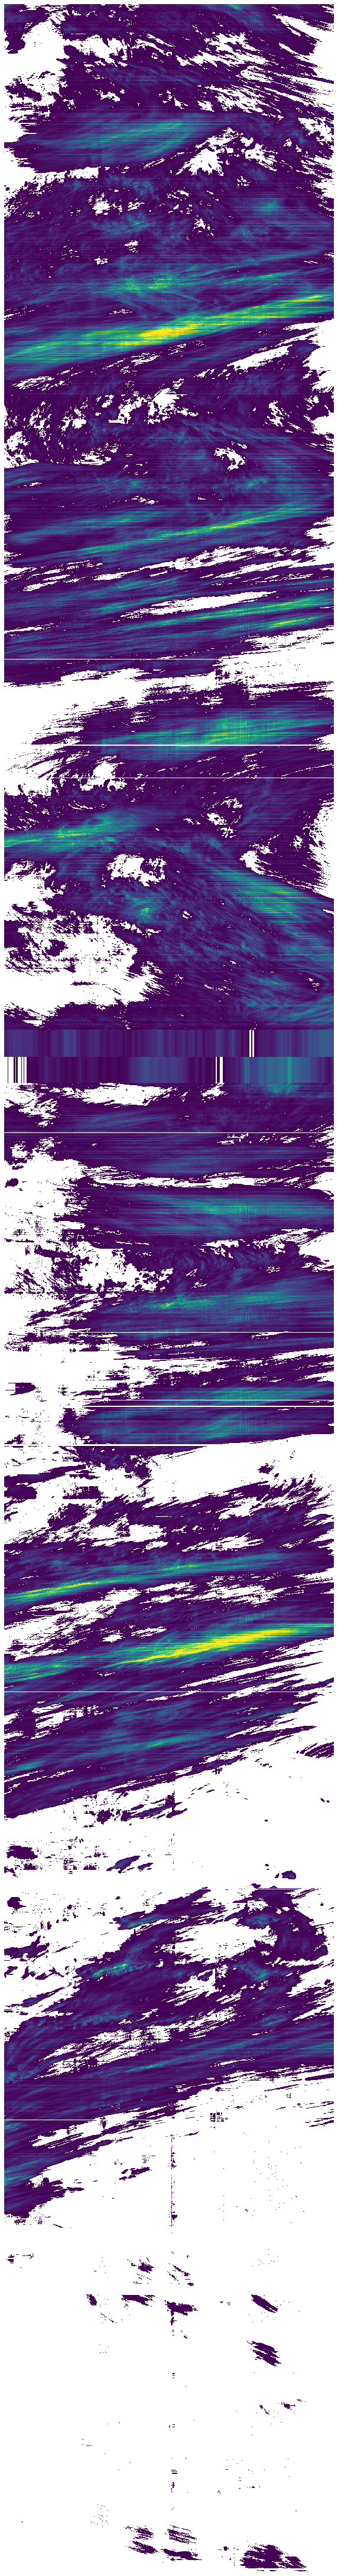

In [71]:
from matplotlib.colors import ListedColormap

def slice(coords: tuple[int, int]):
    r = 20
    xz = np.sum(r3d[coords[1]-r:coords[1]+r, :, :], axis=0)
    yz = np.sum(r3d[:, coords[0]-r:coords[0]+r, :], axis=1)
    return xz, yz

# im1, im2 = slice(bristol)
# im1, im2 = slice(london)
# im1, im2 = slice(highlands)
im2 = s

cmap = plt.get_cmap('viridis')(np.linspace(0, 1, 1000))
cmap[0] = [1,1,1,0]
cmap = ListedColormap(cmap, name='cmap', N=cmap.shape[0])
plt.register_cmap('cmap', cmap)

f, ax = plt.subplots(1,1,figsize=(10,80))
# plt.pcolormesh(lon_ax, t, im1.T)
plt.pcolormesh(lat_ax, t, im2.T)
plt.clim([0, 10000])
plt.set_cmap('cmap')
plt.axis('off')
plt.show()

In [126]:
timestamps = [datetime.datetime.utcfromtimestamp(x[0]) for x in t]
hours = [ts.hour for ts in timestamps]
mins = [ts.minute for ts in timestamps]
days = [ts.day for ts in timestamps]
months = [ts.month for ts in timestamps]

def to_str(ts):
  return str(ts)[:10] + 'T' + str(ts)[11:] + 'Z'

timestamp_strs = [to_str(ts) for ts in timestamps]

lon_buckets = np.linspace(np.min(lon_ax), np.max(lon_ax), 20)
lat_buckets = np.linspace(np.min(lat_ax), np.max(lat_ax), 20)

lon_bucket_idx = [np.argmin(np.abs(lon_ax - lon)) for lon in lon_buckets]
lat_bucket_idx = [np.argmin(np.abs(lat_ax - lat)) for lat in lat_buckets]

with open('D:\\rainfall\\rainfall\\data.csv', 'w') as f:
  f.write('timestamp,longitude,latitude, rainfall\n')
  for i in range(len(lon_buckets) - 1):
    for j in range(len(lat_buckets) - 1):
      for k in range(len(t)):

        min_lat_idx = np.min([lat_bucket_idx[j], lat_bucket_idx[j+1]])
        max_lat_idx = np.max([lat_bucket_idx[j], lat_bucket_idx[j+1]])

        total = np.sum(r3d[min_lat_idx:max_lat_idx, lon_bucket_idx[i]:lon_bucket_idx[i+1], k])

        this_lon = str(0.5 * (lon_buckets[i] + lon_buckets[i+1]))[:5]
        this_lat = str(0.5 * (lat_buckets[j] + lat_buckets[j+1]))[:5]

        f.write(f"{int(t[k]/60/4)},{this_lon},{this_lat},{total}\n")



In [39]:
import os
files = [f for f in os.listdir('D:\\rainfall\\rainfall') if f.endswith('-00Z.png')]


from PIL import Image
from PIL import ImageDraw, ImageFont
 
def add_text(file: str, index: int):
  orig = Image.open(file)
  img = Image.new("RGB", orig.size)
  img.paste(orig, (0,0))
  draw = ImageDraw.Draw(img)
  font = ImageFont.truetype('D:\\rainfall\\rainfall\\roboto\\Roboto-Medium.ttf', 120)
  date, time = file.replace('.png', '').split('T')
  time = time.replace('-', ':').replace('Z', '')
  draw.text((40, 30), f'{date} {time}', fill=(255, 255, 255), font=font)
  
  # Display edited image
  # img.show()
  
  # Save the edited image
  img.save(f'D:\\rainfall\\rainfall\\annotated\\{index:04}.png')

for i, file in enumerate(files):
  try:
    add_text(file, i)
  except:
    print(f'Skipping {file}')
    pass

c:\Users\jasmc\AppData\Local\Programs\Python\Python310\lib\site-packages\PIL\Image.py:945: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


Skipping 2023-06-01T00-45-00Z.png
Skipping 2023-06-01T01-00-00Z.png
Skipping 2023-06-01T01-15-00Z.png
Skipping 2023-06-09T19-00-00Z.png
Skipping 2023-06-14T07-00-00Z.png
Skipping 2023-06-18T03-00-00Z.png
Skipping 2023-06-22T22-00-00Z.png
Skipping 2023-06-22T22-15-00Z.png
Skipping 2023-06-22T22-30-00Z.png
Skipping 2023-06-22T22-45-00Z.png
Skipping 2023-06-23T16-15-00Z.png
Skipping 2023-06-23T16-30-00Z.png
Skipping 2023-06-23T19-15-00Z.png
Skipping 2023-06-25T03-00-00Z.png
Skipping 2023-06-29T00-15-00Z.png
Skipping 2023-07-05T19-00-00Z.png
Skipping 2023-07-05T22-15-00Z.png
Skipping 2023-07-06T13-15-00Z.png
Skipping 2023-07-06T13-30-00Z.png
Skipping 2023-07-06T13-45-00Z.png
Skipping 2023-07-08T05-45-00Z.png


In [56]:
# Missing file ranges - copy prev to fill gap
# (2, 3)
# (2, 4)
# (2, 5)
# (843, 844)
# (1275, 1276)
# (1643, 1644)
# (2103, 2104)
# (2103, 2105)
# (2103, 2106)
# (2103, 2107)
# (2176, 2177)
# (2176, 2178)
# (2188, 2189)
# (2315, 2316)
# (2688, 2689)
# (3243, 3244)
# (3256, 3257)
# (3316, 3317)
# (3316, 3318)
# (3316, 3319)
# (3478, 3479)

import shutil

files = [f for f in os.listdir('D:\\rainfall\\rainfall\\annotated') if f.endswith('.png')]

for i, file in enumerate(files):
    index = int(file.replace('.png', ''))
    prev_index = int(files[i-1].replace('.png', ''))
    if index - prev_index > 1:
        for i in range(prev_index, index - 1):
            src = f'D:\\rainfall\\rainfall\\annotated\\{prev_index:04}.png'
            dst =  f'D:\\rainfall\\rainfall\\annotated\\{(i + 1):04}.png'
            shutil.copyfile(src, dst)


C:\Users\jasmc\AppData\Local\Temp\ipykernel_15400\1373550987.py:12: UserWarning: Trying to register the cmap 'cmap' which already exists.
  plt.register_cmap('cmap', cmap)


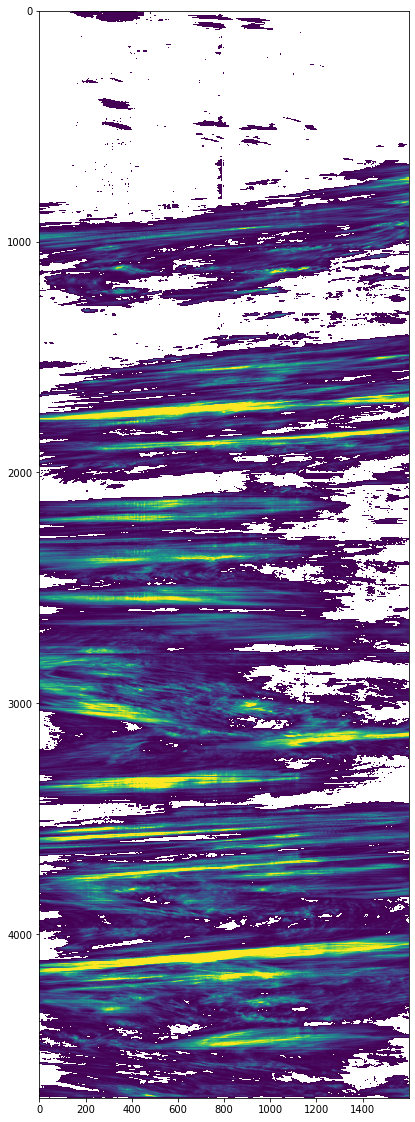

In [62]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

# r3d = np.load('D:\\rainfall\\rainfall\\r3d.npy')

s = np.sum(r3d, axis=1)

cmap = plt.get_cmap('viridis')(np.linspace(0, 1, 1000))
cmap[0] = [1,1,1,0]
cmap = ListedColormap(cmap, name='cmap', N=cmap.shape[0])
plt.register_cmap('cmap', cmap)


f, ax = plt.subplots(1,1,figsize=(20,20))
plt.imshow(s.T)
plt.clim([0, 5000])
plt.set_cmap('cmap')
plt.show()